## MNIST - Hello World for ML

## Softmax Function

In [1]:
import numpy as np

In [2]:
def softmax(a):
    return np.exp(a)/np.sum(np.exp(a))

In [3]:
a = np.array([10, 20, 30])
s = softmax(a)

In [5]:
# how about 900, 1000?
a = np.array([900, 1000])
s = softmax(a)

/tmp/ipykernel_6937/2942892012.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(a)/np.sum(np.exp(a))
/tmp/ipykernel_6937/2942892012.py:2: RuntimeWarning: invalid value encountered in divide
  return np.exp(a)/np.sum(np.exp(a))


In [11]:
# a new version of softmax
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    return exp_a/np.sum(exp_a)

In [12]:
# check if this modification resolves the overflow issue.
a = np.array([900, 1000])
s = softmax(a)

In [13]:
s

array([3.72007598e-44, 1.00000000e+00])

## MNIST dataset

In [30]:
import urllib
import gzip
import numpy as np
import pickle
import os

In [84]:
image_size = 28*28
dataset_dir = 'dataset'
dataset_pkl = 'mnist.pkl'
url_base = 'http://jrkwon.com/data/ece5831/mnist/' # 'https://yann.lecun.com/exdb/mnist/'

In [15]:
key_file = {
    'train_images': 'train-images-idx3-ubyte.gz',
    'train_labels': 'train-labels-idx1-ubyte.gz',
    'test_images':  't10k-images-idx3-ubyte.gz',
    'test_labels':  't10k-labels-idx1-ubyte.gz'
}

Let's test if `key_file` works!

In [16]:
key_file['train_images']

'train-images-idx3-ubyte.gz'

Let's try to download one of these files if the idea works.

Make sure that you're in 'ece5831-2024-code/05'

In [18]:
!pwd

/home/umd-jrkwon/Documents/ece5831-2024-code/05


In [110]:
file_name = key_file['train_images']
file_path = url_base + file_name

# to resolve 406 Not Acceptable error
opener = urllib.request.build_opener()
opener.addheaders = [('Accept', '')]
urllib.request.install_opener(opener)

# downloading the file
urllib.request.urlretrieve(file_path, dataset_dir + '/' + file_name)


('dataset/train-images-idx3-ubyte.gz',
 <http.client.HTTPMessage at 0x7a44b3ddbe50>)

In [31]:
os.path.exists(dataset_dir + '/' + file_name)

True

In [35]:
def _download(file_name):
    file_path = dataset_dir + '/' + file_name

    if (os.path.exists(file_path)):
        print(f'File: {file_name} already exists.')
        return
    
    print(f'Downloading {file_name}...')
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print('Done')


In [34]:
def _download_all():
    for file_name in key_file.values():
        _download(file_name)

In [36]:
_download_all()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.


Let's create two functions: `_load_images` and `_load_lables`.

In [41]:
def _load_images(file_name):
    with gzip.open(file_name, 'rb') as f:
        images = np.frombuffer(f.read(), np.uint8, offset=16)
    images = images.reshape(-1, image_size)

    return images

In [43]:
images = _load_images(dataset_dir + '/' + key_file['test_images'])

In [44]:
images.shape

(10000, 784)

In [45]:
import matplotlib.pyplot as plt

In [48]:
idx = 1000

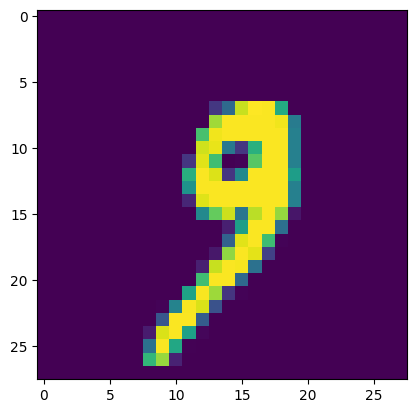

In [49]:
a = images[idx].reshape(28,28)
plt.imshow(a)

In [50]:
def _load_labels(file_name):
    with gzip.open(file_name, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)

    return labels

In [54]:
labels = _load_labels(f"{dataset_dir}/{key_file['test_labels']}")

In [55]:
labels[idx]

9

In [85]:
def _create_dataset():
    dataset = {}
    dataset['train_images'] = _load_images(f"{dataset_dir}/{key_file['train_images']}")
    dataset['train_labels'] = _load_labels(f"{dataset_dir}/{key_file['train_labels']}")
    dataset['test_images']  = _load_images(f"{dataset_dir}/{key_file['test_images']}")
    dataset['test_labels']  = _load_labels(f"{dataset_dir}/{key_file['test_labels']}")

    with open(f'{dataset_dir}/{dataset_pkl}', 'wb') as f:
        print(f'Pickle: {dataset_dir}/{dataset_pkl} is being created.')
        pickle.dump(dataset, f)
        print('Done.') 
           
    return dataset


In [66]:
dataset = _create_dataset()

Label: 9


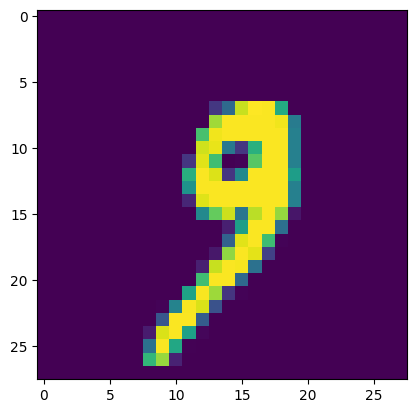

In [71]:
plt.imshow(dataset['test_images'][idx].reshape(28,28))
print(f"Label: {dataset['test_labels'][idx]}")

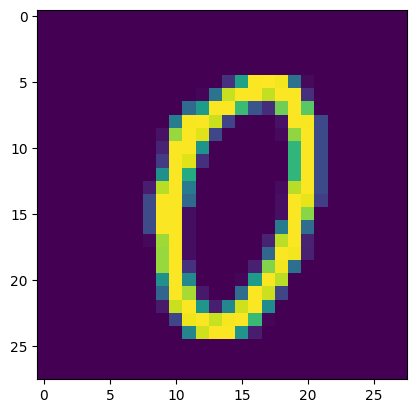

In [63]:
img = dataset['train_images'][idx].reshape(28,28)
plt.imshow(img)

In [80]:
def _change_one_hot_label(y, num_class):
    t = np.zeros((y.size, num_class))
    for idx, row in enumerate(t):
        row[y[idx]] = 1
    
    return t

In [81]:
y = np.array([1, 0, 9, 8])
one_hot_y = _change_one_hot_label(y, 10)

In [82]:
print(y)
print(one_hot_y)

[1 0 9 8]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [94]:
def _init_dataset():
    _download_all()
    if os.path.exists(f'{dataset_dir}/{dataset_pkl}'):
        with open(f'{dataset_dir}/{dataset_pkl}', 'rb') as f:
            print(f'Pickle: {dataset_dir}/{dataset_pkl} already exists.')
            print('Loading...')
            dataset = pickle.load(f)
            print('Done.')
    else:
        dataset = _create_dataset()

    return dataset

In [92]:
# clear the dictionary for testing the loading dataset
dataset = {}

In [87]:
dataset = _init_dataset()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl is being created.
Done.


In [95]:
dataset = _init_dataset()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


In [96]:
dataset['train_images'].shape

(60000, 784)

## MNIST Data Class


In [32]:
import urllib
import gzip
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

In [43]:
class MnistData():

    image_dim = (28, 28)
    image_size = image_dim[0]*image_dim[1]
    dataset_dir = 'dataset'
    dataset_pkl = 'mnist.pkl'
    url_base = 'http://jrkwon.com/data/ece5831/mnist/' # 'https://yann.lecun.com/exdb/mnist/'

    key_file = {
        'train_images': 'train-images-idx3-ubyte.gz',
        'train_labels': 'train-labels-idx1-ubyte.gz',
        'test_images':  't10k-images-idx3-ubyte.gz',
        'test_labels':  't10k-labels-idx1-ubyte.gz'
    }

    def __init__(self):
        self.dataset = {}
        self.dataset_pkl_path = f'{self.dataset_dir}/{self.dataset_pkl}'

        # create dataset_dir if the dir doesn't exist
        if os.path.exists(self.dataset_dir) is not True:
            os.mkdir(self.dataset_dir)

        self._init_dataset()


    def _change_one_hot_label(self, y, num_class):
        t = np.zeros((y.size, num_class))
        for idx, row in enumerate(t):
            row[y[idx]] = 1
        
        return t


    def _download(self, file_name):
        file_path = self.dataset_dir + '/' + file_name

        if (os.path.exists(file_path)):
            print(f'File: {file_name} already exists.')
            return
        
        print(f'Downloading {file_name}...')

        # to resolve 406 Not Acceptable error
        opener = urllib.request.build_opener()
        opener.addheaders = [('Accept', '')]
        urllib.request.install_opener(opener)

        urllib.request.urlretrieve(self.url_base + file_name, file_path)
        print('Done')


    def _download_all(self):
        for file_name in self.key_file.values():
            self._download(file_name)

    
    def _load_images(self, file_name):
        with gzip.open(file_name, 'rb') as f:
            images = np.frombuffer(f.read(), np.uint8, offset=16)
        images = images.reshape(-1, self.image_size)

        return images
    

    def _load_labels(self, file_name):
        with gzip.open(file_name, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)

        return labels
    

    def _create_dataset(self):
        file_name = f"{self.dataset_dir}/{self.key_file['train_images']}"
        self.dataset['train_images'] = self._load_images(file_name)

        file_name = f"{self.dataset_dir}/{self.key_file['train_labels']}"
        self.dataset['train_labels'] = self._load_labels(file_name)

        file_name = f"{self.dataset_dir}/{self.key_file['test_images']}"
        self.dataset['test_images']  = self._load_images(file_name)

        file_name = f"{self.dataset_dir}/{self.key_file['test_labels']}"
        self.dataset['test_labels']  = self._load_labels(file_name)

        with open(f'{self.dataset_pkl_path}', 'wb') as f:
            print(f'Pickle: {self.dataset_pkl_path} is being created.')
            pickle.dump(self.dataset, f)
            print('Done.') 


    def _init_dataset(self):
        self._download_all()
        if os.path.exists(f'{self.dataset_pkl_path}'):
            with open(f'{self.dataset_pkl_path}', 'rb') as f:
                print(f'Pickle: {self.dataset_pkl_path} already exists.')
                print('Loading...')
                self.dataset = pickle.load(f)
                print('Done.')
        else:
            self._create_dataset()


    def load(self):
        # normalize image datasets
        for key in ('train_images', 'test_images'):
            self.dataset[key] = self.dataset[key].astype(np.float32)
            self.dataset[key] /= 255.0

        # one-hot encoding
        for key in ('train_labels', 'test_labels'):
            self.dataset[key] = self._change_one_hot_label(self.dataset[key], 10)

        return (self.dataset['train_images'], self.dataset['train_labels']), \
                (self.dataset['test_images'], self.dataset['test_labels'])


In [46]:
mnist_data = MnistData()
(_, _), (test_images, test_labels) = mnist_data.load()


Done
Done
Done
Done
Pickle: dataset/mnist.pkl is being created.
Done.


Let's test if dataset files and the pickle file exist.

In [47]:
mnist_data = MnistData()
(_, _), (test_images, test_labels) = mnist_data.load()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


In [25]:
test_images.shape

(10000, 784)

In [26]:
labels = mnist_data.dataset['test_labels']

In [28]:
# Note that the labels are not one-hot-encoded.
labels.shape

(10000, 10)

In [45]:
mnist_data.image_dim

(28, 28)

Visualize a test image.

In [34]:
idx = np.random.randint(test_images.shape[0], size=1)

Label (one-hot): [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Label: 4


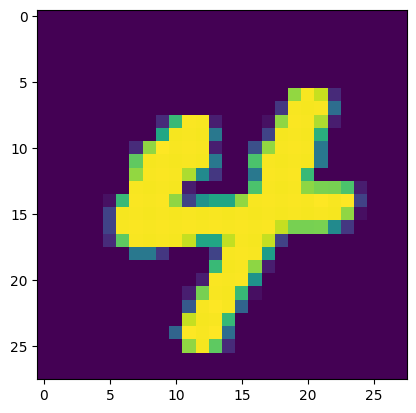

In [38]:
print(f'Label (one-hot): {test_labels[idx]}')
print(f'Label: {np.argmax(test_labels[idx])}')
plt.imshow(test_images[idx].reshape(28,28))